Continuing on the previous blog post, this post will demonstrate the Central Limit Theorem on a dataset that was sampled from a series of random distributions. I won't give away exactly how I generated the dataset, but I will tell you that the random distributions I used to generate the data were definitely not Gaussian. However, as we found last time, this doesn't matter. The Central Limit Theorem even applies to datasets where the sampling distribution is unknown.

First, let's load the dataset and look at a histogram of the values, which should clearly demonstrate that the dataset is not Gaussian.

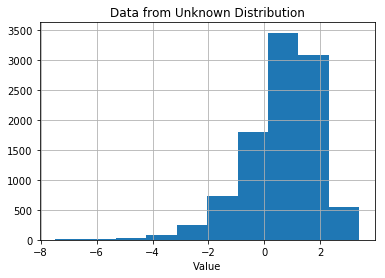

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read the data and plot a histogram
df = pd.read_csv('20170419_data_bootstrap.csv', header=None)
df.hist()
plt.title('Data from Unknown Distribution')
plt.xlabel('Value');

According to the figure above, the distribution is heavily skewed towards the right, with a much longer tail on the left side. It does not appear to be Gaussian.

As a reminder from the previous post, the Central Limit Theorem states:

**The arithmetic mean of a sufficiently large number of samples taken from an independent random distribution will be approximately normally distributed, regardless of the underlying distribution.**

We can still demonstrate the Central Limit Theorem with this dataset, even though we don't know the initial random distribution that the data was sampled from. This will be accomplished using a statistical technique called *bootstrapping*, which is often used to obtain confidence intervals when the initial distribution is unknown.

Bootstrapping works by randomly sampling the known data, each time replacing the data point so that it might be selected again ("random sampling with replacement"). Why might this process work for calculating confidence intervals? You can think of a dataset as a "discrete" type of distribution. Even if we don't know the original random distribution that it came from, samples taken from the dataset will still follow some exploitable rules, such as the Central Limit Theorem.

Let's demonstrate this on our dataset above. First, let's sample the dataset 100 times (with replacement). Luckily, numpy has a function that makes this process very easy:

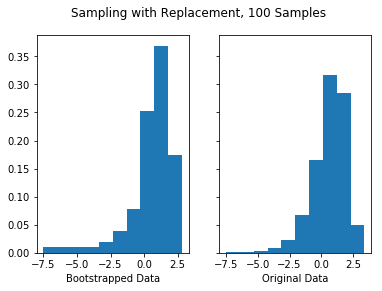

In [2]:
import numpy as np
# random.choice takes a data array, and you provide it with 
# the size of samples that you want, with replacement or
# without replacement
boot = np.random.choice(df[0].values, 100, replace=True)
# Let's look at the histogram of the data again, to compare
# it to the first figure.
boot_df = pd.DataFrame(boot)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.suptitle('Sampling with Replacement, 100 Samples')
ax1.hist(boot_df[0].values, normed=1)
ax1.set_xlabel('Bootstrapped Data')
ax2.hist(df[0].values, normed=1)
ax2.set_xlabel('Original Data');

Notice that the histogram of the bootstrapped data looks similar to the original data, but it's certainly not perfect. The original dataset had slightly over 10000 data points, but we only took 100 samples. Let's try the same process as above, but with 10000 samples:

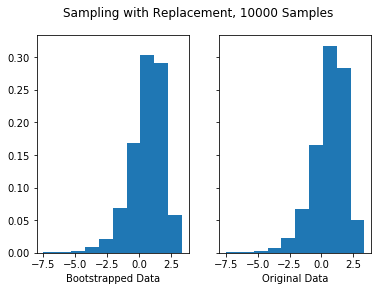

In [3]:
import numpy as np
# random.choice takes a data array, and you provide it with 
# the size of samples that you want, with replacement or
# without replacement
boot2 = np.random.choice(df[0].values, 10000, replace=True)
# Let's look at the histogram of the data again, to compare
# it to the first figure.
boot_df2 = pd.DataFrame(boot2)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.suptitle('Sampling with Replacement, 10000 Samples')
ax1.hist(boot_df2[0].values, normed=1)
ax1.set_xlabel('Bootstrapped Data')
ax2.hist(df[0].values, normed=1)
ax2.set_xlabel('Original Data');

Now the bootstrapped data looks very similar to the original data. In general, it's preferable to choose at least the same order of magnitude of samples as the original dataset, but this is not advisable in all circumstances. 

Finally, let's apply Monte Carlo simulation to this demonstration. According to the Central Limit Theorem, if we take the mean of the bootstrapping process above, many times, we should see that the distribution of the means looks Gaussian, despite the fact that our original dataset it clearly not Gaussian:

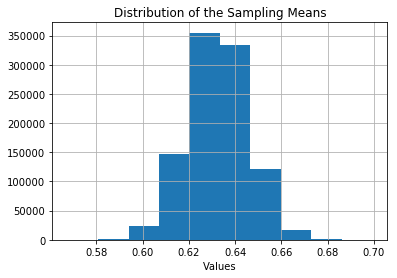

In [4]:
num_hist = int(1e6)
# Run the Monte Carlo simulation with the above number of histories
mc_boot = []
for _ in range(num_hist):
    # Random sampling with replacement
    boot3 = np.random.choice(df[0].values, 10000, replace=True)
    # Save the mean of the random sampling in the mc_boot array
    mc_boot.append(np.mean(boot3))
# Plot the results
mc_df = pd.DataFrame(mc_boot)
mc_df.hist();
plt.title('Distribution of the Sampling Means')
plt.xlabel('Values');

As expected, the distribution of the mean of each bootstrapped sample looks Gaussian, demonstrating the Central Limit Theorem yet again, even on a "discrete" dataset.